In [439]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib as mpl

font_path = os.path.join('Fonts', 'Formula1_font.ttf')
font_manager.fontManager.addfont(font_path)
f1_font = font_manager.FontProperties(fname=font_path)


In [440]:
seasonDrivers = pd.read_csv('Formula1_2024season_drivers.csv')
seasonTeams = pd.read_csv('Formula1_2024season_teams.csv')
sprintQualifyingResults = pd.read_csv('Formula1_2024season_sprintQualifyingResults.csv')
sprintResults = pd.read_csv('Formula1_2024season_sprintResults.csv')
qualifyingResults = pd.read_csv('Formula1_2024season_qualifyingResults.csv')
driverOfTheDay = pd.read_csv('Formula1_2024season_driverOfTheDayVotes.csv')
raceResults = pd.read_csv('Formula1_2024season_raceResults.csv')


In [473]:
# Assign Driver Colors
def assign_color_drivers(drivers):
    color_map = {
        'Valtteri Bottas': '#52D752',
        'Guanyu Zhou': '#52D752',
        'Nico Hulkenberg': '#FFFFFF',
        'Kevin Magnussen': '#FFFFFF',
        'Oliver Bearman': '#FFFFFF',
        'Fernando Alonso': '#006F62',
        'Lance Stroll': '#006F62',
        'Lando Norris': '#FF8205',
        'Oscar Piastri': '#FF8205',
        'Max Verstappen': '#0600F0',
        'Sergio Perez': '#0600F0',
        'Charles Leclerc': '#FF0000',
        'Carlos Sainz': '#FF0000',
        'Lewis Hamilton': '#00C8AA',
        'George Russell': '#00C8AA',
        'Esteban Ocon': '#FF87BB',
        'Pierre Gasly': '#FF87BB',
        'Jack Doohan': '#FF87BB',
        'Alex Albon': '#005AFF',
        'Logan Sargeant': '#005AFF',
        'Jamie Chadwick': '#005AFF',
        'Yuki Tsunoda': '#6692D1',
        'Daniel Ricciardo': '#6692D1',
        'Liam Lawson': '#6692D1',
    }

    return [color_map.get(name, '#888888') for name in drivers]

# Assign Team colours
def assign_color_teams(teams):
    color_map = {
        'Mercedes': '#00C8AA',   
        'Haas Ferrari': '#FFFFFF',  
        'Aston Martin Aramco Mercedes': '#006F62',  
        'Williams Mercedes': '#005AFF',   
        'Racing Bulls Honda RBPT': '#6692D1', 
        'McLaren Mercedes': '#FF8205',   
        'Red Bull Racing Honda RBPT': '#0600F0',   
        'Ferrari': '#FF0000',   
        'Kick Sauber Ferrari': '#52D752',    
        'Alpine Renault': '#FF87BB',   
    }
    
    return [color_map.get(team, '#888888') for team in teams] 


In [535]:
# Set the dark theme for F1
def set_f1_dark_theme():
    mpl.rcParams.update({
        'figure.facecolor': '#15151E',
        'axes.facecolor': '#15151E',
        'axes.edgecolor': '#FFFFFF',
        'axes.labelcolor': '#FFFFFF',
        'axes.titleweight': 'bold',
        'axes.titlesize': 20,
        'axes.labelsize': 14,
        'xtick.color': '#CCCCCC',
        'ytick.color': '#CCCCCC',
        'axes.labelpad': 22,
        'grid.color': '#444444',
        'grid.alpha': 0.3,
        'legend.facecolor': '#222222',
        'legend.edgecolor': '#444444',
        'text.color': '#FFFFFF',
        'font.family': f1_font.get_name(),
        'figure.autolayout': True,
        'savefig.facecolor': '#121212',
    })

set_f1_dark_theme()

In [ ]:
# ----- 2024 Season Teams -----
seasonTeams

In [ ]:
# ----- 2024 Season Drivers -----
def join_driver_info(seasonDrivers):
    if 'Driver' in seasonDrivers.columns and 'Abbreviation' in seasonDrivers.columns:
        seasonDrivers['DriverInfo'] = seasonDrivers['Driver'].astype(str).str.strip() + ' - ' + seasonDrivers['Abbreviation'].astype(str).str.strip()
    else:
        print("Driver and/or Abbreviation Missing")
    return seasonDrivers
join_driver_info(seasonDrivers)
info = ['No', 'DriverInfo', 'Team', 'Country', 'Podiums', 'Points', 'Grands Prix Entered', 'World Championships', 'Highest Race Finish', 'Highest Grid Position']
seasonDrivers[info].head(24)

In [ ]:
# ----- Sprint Qualifying Results ----- 

# Fill Missing Values with N/A
sprintQualifyingResults = sprintQualifyingResults.fillna('DNQ')

# columns to insert
results = ['Track', 'Position', 'Driver', 'Team', 'Q1', 'Q2', 'Q3', 'Laps']
sprintQualifyingResults[results]


In [ ]:
# ----- Sprint Qualifying Results Data Visualization -----
import numpy as np

set_f1_dark_theme

for col in ['Q1', 'Q2', 'Q3']:
    sprintQualifyingResults[col] = (sprintQualifyingResults[col].astype(str).str.strip().replace({'DNQ': np.nan, 'DNF':np.nan, 'NC':np.nan, '': np.nan}))

for col in ['Q1', 'Q2', 'Q3']:
    sprintQualifyingResults[col] = sprintQualifyingResults[col].replace('nan', np.nan)

sprintQualifyingResults_numeric = sprintQualifyingResults.copy()

sprintQualifyingResults_numeric['Made_Q2'] = sprintQualifyingResults_numeric['Q2'].notna()
sprintQualifyingResults_numeric['Made_Q3'] = sprintQualifyingResults_numeric['Q3'].notna()

team_progress = sprintQualifyingResults_numeric.groupby('Team')[['Made_Q2', 'Made_Q3']].sum()

team_progress_sorted = team_progress.sort_values(by='Made_Q3', ascending=True)
team_colors = assign_color_teams(team_progress_sorted.index.tolist())

team_progress_sorted.plot(
    kind='barh',
    figsize=(12, 6),
    color=team_colors,
)
plt.title('Teams Progression to Q2 & Q3 (Sprint Races)', fontproperties=f1_font, fontsize=20, fontweight='bold', pad=22)
plt.xlabel('No. of Times Qualified', fontproperties=f1_font, fontsize=14)
plt.ylabel('Team', fontproperties=f1_font, fontsize=14)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', bottom=False, labelbottom=False)

for container in ax.containers:
    for bar in container:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        if width > 0:
            ax.text(width + 0.3, y, f"{int(width)}", va='center', ha='left', fontsize=8, color='white', fontproperties=f1_font)

plt.grid(axis='x', alpha=0.3)
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [ ]:
# 2024 Sprint Results
sprintResults

In [ ]:
# ----- Sprint Race results (Data Visualization)-----
import matplotlib.pyplot as plt

set_f1_dark_theme

sprintResults['Track'] = sprintResults['Track'].astype(str).str.strip()
sprintResults['RawPosition'] = sprintResults['Position'].astype(str).str.strip()
sprintResults['Position'] = pd.to_numeric(sprintResults['RawPosition'], errors='coerce')


# Loop over each unique track
for track in sprintResults['Track'].unique():
    # Filter data for that specific track
    track_data = sprintResults[sprintResults['Track'] == track].sort_values(by='Position')

    if track_data.empty:
        continue

    drivers = track_data['Driver'].tolist()
    positions = track_data['Position'].fillna(track_data['Position'].max() + 1).tolist()
    raw_positions = track_data['RawPosition'].tolist()
    time = track_data['Time/Retired'].tolist()
    colors = assign_color_drivers(drivers)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.barh(drivers, positions, color=colors)
    plt.gca().invert_yaxis()  # 1st position at the top

    plt.title(f'Sprint Race Results - {track}', fontproperties=f1_font, fontsize=20, fontweight='bold')
    plt.xlabel('Race Position', labelpad=22, fontproperties=f1_font, fontsize=14)
    plt.ylabel('Driver', labelpad=22, fontproperties=f1_font, fontsize=14)
    plt.margins(x=0.1) 

    for i, (pos, raw_pos, driver, timing) in enumerate(zip(positions, raw_positions, drivers, time)):
        if pd.isna(raw_pos):
            label = f"{timing}"
            xpos = 0.3
        else:
            label = f"P{int(pos)} ({timing})"
            xpos = pos + 0.3

        plt.text(xpos, i, label, va='center', ha='left', fontsize=10, color='white', fontproperties=f1_font)


    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='x', bottom=False, labelbottom=False)


    plt.tight_layout()
    plt.show()



In [ ]:
qualifyingResults

In [ ]:
# Weekend Qualifying Results
# ----- Race Weekend Qualifying Results ----- 

# Fill Missing Values with N/A
qualifyingResults = qualifyingResults.fillna('DNQ')

# columns to insert
results = ['Track', 'Position', 'Driver', 'Team', 'Q1', 'Q2', 'Q3', 'Laps']
qualifyingResults[results]

In [ ]:
# ----- Weekend Qualifying Results Data Visualization -----
import matplotlib.pyplot as plt
import numpy as np

set_f1_dark_theme

for col in ['Q1', 'Q2', 'Q3']:
    qualifyingResults[col] = (qualifyingResults[col].astype(str).str.strip().replace({'DNQ': np.nan, 'DNF':np.nan, 'NC':np.nan, '': np.nan}))

for col in ['Q1', 'Q2', 'Q3']:
    qualifyingResults[col] = qualifyingResults[col].replace('nan', np.nan)

qualifyingResults_numeric = qualifyingResults.copy()

qualifyingResults_numeric['Made_Q2'] = qualifyingResults_numeric['Q2'].notna()
qualifyingResults_numeric['Made_Q3'] = qualifyingResults_numeric['Q3'].notna()

grandPrixs_team_progress = qualifyingResults_numeric.groupby('Team')[['Made_Q2', 'Made_Q3']].sum()

grandPrixs_team_progress_sorted = grandPrixs_team_progress.sort_values(by='Made_Q3', ascending=True)
team_colors = assign_color_teams(grandPrixs_team_progress_sorted.index.tolist())

grandPrixs_team_progress_sorted.plot(
    kind='barh',
    figsize=(12, 6),
    color=team_colors,
)
plt.title('Teams Progression to Q2 & Q3', fontproperties=f1_font, fontsize=20, fontweight='bold', pad=22)
plt.xlabel('No. of Times Qualified', fontproperties=f1_font, fontsize=14)
plt.ylabel('Team', fontproperties=f1_font, fontsize=14)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', bottom=False, labelbottom=False)

for container in ax.containers:
    for bar in container:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        if width > 0:
            ax.text(width + 0.3, y, f"{int(width)}", va='center', ha='left', fontsize=8, color='white', fontproperties=f1_font)

plt.grid(axis='x')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [ ]:
# ----- Grand Prix Race results (Data Visualization)-----
import matplotlib.pyplot as plt

set_f1_dark_theme

raceResults['Track'] = raceResults['Track'].astype(str).str.strip()
raceResults['RawPosition'] = raceResults['Position'].astype(str).str.strip()
raceResults['Position'] = pd.to_numeric(raceResults['RawPosition'], errors='coerce')


# Loop over each unique track
for track in raceResults['Track'].unique():
    # Filter data for that specific track
    track_data = raceResults[raceResults['Track'] == track].sort_values(by='Position')

    if track_data.empty:
        continue

    drivers = track_data['Driver'].tolist()
    positions = track_data['Position'].fillna(track_data['Position'].max() + 1).tolist()
    raw_positions = track_data['RawPosition'].tolist()
    time = track_data['Time/Retired'].tolist()
    colors = assign_color_drivers(drivers)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.barh(drivers, positions, color=colors)
    plt.gca().invert_yaxis()  # 1st position at the top

    plt.title(f'Sprint Race Results - {track}', fontproperties=f1_font, fontsize=20, fontweight='bold')
    plt.xlabel('Race Position', labelpad=22, fontproperties=f1_font, fontsize=14)
    plt.ylabel('Driver', labelpad=22, fontproperties=f1_font, fontsize=14)
    plt.margins(x=0.1) 

    for i, (pos, raw_pos, driver, timing) in enumerate(zip(positions, raw_positions, drivers, time)):
        if pd.isna(raw_pos):
            label = f"{timing}"
            xpos = 0.3
        else:
            label = f"P{int(pos)} ({timing})"
            xpos = pos + 0.3

        plt.text(xpos, i, label, va='center', ha='left', fontsize=10, color='white', fontproperties=f1_font)


    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='x', bottom=False, labelbottom=False)


    plt.tight_layout()
    plt.show()



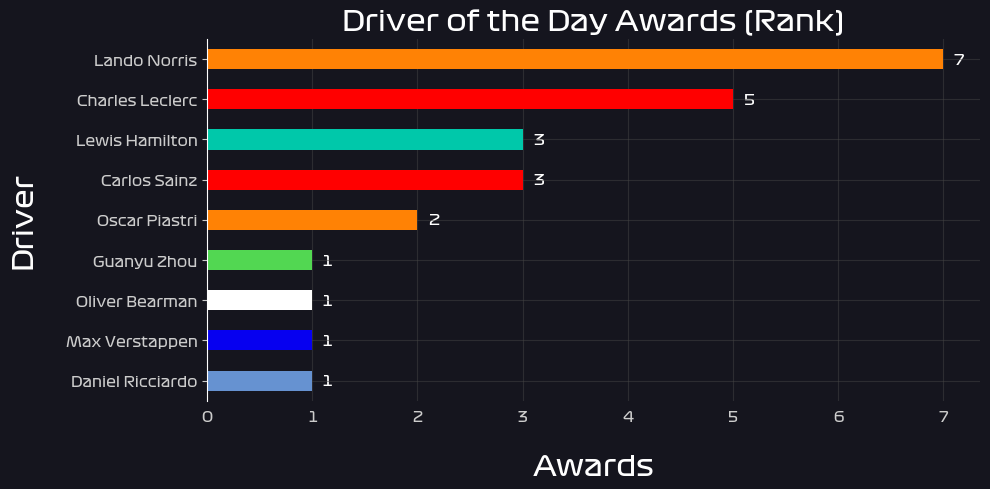

In [538]:
# ----- Driver of the day Awards (Data Visualization) -----
set_f1_dark_theme
driverOfTheDay_Awards = driverOfTheDay['1st Place'].value_counts()
driverOfTheDay_Awards = driverOfTheDay_Awards.sort_values()
idx = driverOfTheDay_Awards.index

# Plot 
driverOfTheDay_Awards.plot(
    kind='barh',
    figsize=(10,5),
    zorder=2,
    color=assign_color_drivers(driverOfTheDay_Awards.index)
)
plt.title('Driver of the Day Awards (Rank)')
plt.xlabel('Awards', fontsize=20, fontweight='bold')
plt.ylabel('Driver', fontsize=20, fontweight='bold')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='x', bottom=False)

for i, (driver, count) in enumerate(zip(driverOfTheDay_Awards.index, driverOfTheDay_Awards.values)):
    plt.text(count + 0.1, i, str(count), va='center', fontweight='bold', fontsize=11, zorder=1)

plt.grid(axis='x', alpha=0.5, zorder=0)
plt.grid(axis='y', alpha=0.5, zorder=0)
plt.tight_layout()
plt.show()

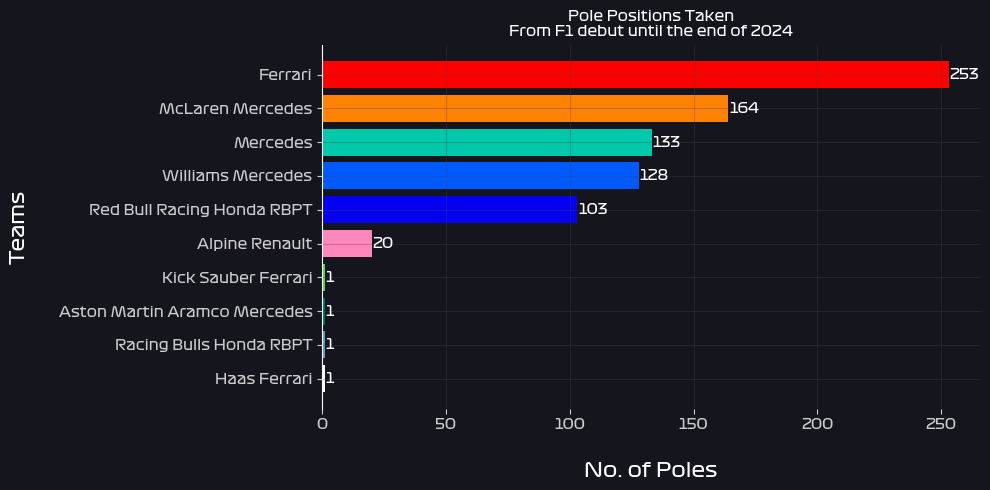

In [539]:
# Teams overall No. of poles since F1 debut
import matplotlib.pyplot as plt

set_f1_dark_theme()

# Sorting
seasonTeams_sorted = seasonTeams.sort_values(by='Pole Positions', ascending=True)

teams = seasonTeams_sorted['Team'].tolist()     
poles = seasonTeams_sorted['Pole Positions'].tolist() 
colors = assign_color_teams(teams)

# Create the plot
plt.figure(figsize=(10, 5))

plt.title('Pole Positions Taken\nFrom F1 debut until the end of 2024', fontsize=20, fontweight='bold', fontproperties=f1_font)
plt.ylabel('Teams', fontsize=14, fontweight='bold', fontproperties=f1_font)
plt.xlabel('No. of Poles', fontsize=14, fontweight='bold', fontproperties=f1_font)

bars = plt.barh(teams, poles, color=colors, alpha=1.0)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.grid(axis='x', alpha=0.3)
plt.grid(axis='y', alpha=0.3)

# Add pole numbers to end of each bar
for i, (value, team) in enumerate(zip(poles, teams)):
    plt.text(value + 0.3, i, str(value), va='center', ha='left', fontsize=10, color='white', fontproperties=f1_font)

plt.tight_layout()
plt.show()
